In [ ]:
"""
Kurtosis measures how “extreme” the ups and downs are in a set of data.

Kurtosis is a way to describe the shape of a distribution — specifically, how tall and skinny or short and flat the peak is, and how fat or thin the tails are (the edges of the graph).

🧁 Easy Analogy: Think of Cupcakes 🍰
Imagine baking cupcakes.

Some cupcakes rise a lot in the center (tall peak).

Some stay flat (low peak).

Some have batter that spills out to the sides (fat tails).

Kurtosis tells us how the data “piles up” around the average and how much data is way out at the extremes.


📊 Types of Kurtosis:
1. Normal Kurtosis (Mesokurtic)

Like a normal bell curve.

2. Tails are average, peak is average.

High Kurtosis (Leptokurtic)

Very tall peak and fat tails.

More chances of extreme events (big gains or losses).

3. Low Kurtosis (Platykurtic)

Flat peak and thin tails.

Less chance of extreme values.

"""



'\nKurtosis measures how “extreme” the ups and downs are in a set of data.\n\nKurtosis is a way to describe the shape of a distribution — specifically, how tall and skinny or short and flat the peak is, and how fat or thin the tails are (the edges of the graph).\n\n🧁 Easy Analogy: Think of Cupcakes 🍰\nImagine baking cupcakes.\n\nSome cupcakes rise a lot in the center (tall peak).\n\nSome stay flat (low peak).\n\nSome have batter that spills out to the sides (fat tails).\n\nKurtosis tells us how the data “piles up” around the average and how much data is way out at the extremes.\n\n\n📊 Types of Kurtosis:\n1. Normal Kurtosis (Mesokurtic)\n\nLike a normal bell curve.\n\n2. Tails are average, peak is average.\n\nHigh Kurtosis (Leptokurtic)\n\nVery tall peak and fat tails.\n\nMore chances of extreme events (big gains or losses).\n\n3. Low Kurtosis (Platykurtic)\n\nFlat peak and thin tails.\n\nLess chance of extreme values.\n\n'

[*********************100%***********************]  1 of 1 completed


^GSPC Kurtosis Analysis:
Actual Kurtosis: 15.9480
Excess Kurtosis: 12.9480

^GSPC Kurtosis Analysis:
Actual Kurtosis: 15.9480
Excess Kurtosis: 12.9480


ValueError: Length of values (100) does not match length of index (1)

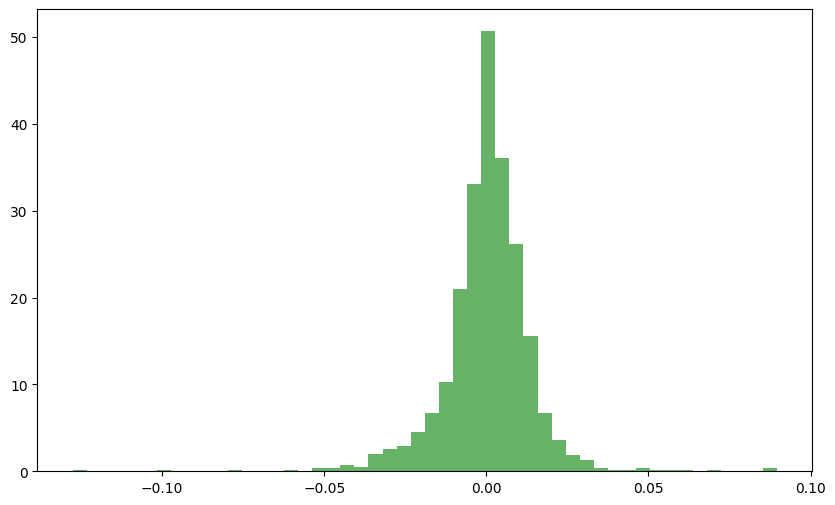

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

# 1. Download financial time series data
def download_data(ticker, start_date, end_date):
    """
    Download stock data using Yahoo Finance API
    """
    #Changed auto_adjust = False manually b/c Yahoo Finance API was updated to automatically adjust for dividends and splits
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
    return data['Adj Close']

# 2. Calculate daily returns
def calculate_returns(prices):
    """
    Calculate daily logarithmic returns
    """
    return np.log(prices / prices.shift(1)).dropna()

# 3. Analyze kurtosis
def analyze_kurtosis(returns, title):

    #Strip series with labels
    arr = returns.to_numpy()

    #calculate kurtosis (added .item() to extract scalar for formatting)
    kurt = kurtosis(arr, fisher=False,).item() #actual kurtosis
    excess_kurt = kurtosis(arr, fisher=True,  bias=False, nan_policy="omit").item() #excess kurtosis

    print(f"\n{title} Kurtosis Analysis:")
    print(f"Actual Kurtosis: {kurt:.4f}")
    print(f"Excess Kurtosis: {excess_kurt:.4f}")


    print(f"\n{title} Kurtosis Analysis:")
    print(f"Actual Kurtosis: {kurt:.4f}")
    print(f"Excess Kurtosis: {excess_kurt:.4f}")

    # Visualize
    plt.figure(figsize=(10, 6))
    plt.hist(returns, bins=50, density=True, alpha=0.6, color='g')

    # Plot normal distribution for comparison
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = np.exp(-(x - returns.mean())**2 / (2 * returns.std()**2)) / (returns.std() * np.sqrt(2 * np.pi))
    plt.plot(x, p, 'k', linewidth=2)

    plt.title(f"{title}\nKurtosis: {kurt:.2f} (Excess: {excess_kurt:.2f})")
    plt.xlabel('Daily Returns')
    plt.ylabel('Density')
    plt.show()

    return kurt, excess_kurt

# 4. Compare different assets
def compare_assets(assets, start_date, end_date):
    """
    Compare kurtosis across different assets
    """
    results = {}

    for asset in assets:
        prices = download_data(asset, start_date, end_date)
        returns = calculate_returns(prices)
        kurt, excess_kurt = analyze_kurtosis(returns, asset)
        results[asset] = {
            'kurtosis': kurt,
            'excess_kurtosis': excess_kurt,
            'returns': returns
        }

    return results

# 5. Rolling kurtosis analysis
def rolling_kurtosis(returns, window=252):
    """
    Calculate rolling kurtosis over time
    """
    rolling_kurt = returns.rolling(window).apply(lambda x: kurtosis(x, fisher=False))

    plt.figure(figsize=(12, 6))
    rolling_kurt.plot()
    plt.title(f'Rolling {window}-Day Kurtosis')
    plt.xlabel('Date')
    plt.ylabel('Kurtosis')
    plt.axhline(y=3, color='r', linestyle='--', label='Normal Distribution')
    plt.legend()
    plt.show()

    return rolling_kurt

# Main execution
if __name__ == "__main__":
    # Define parameters
    assets = ['^GSPC', 'BTC-USD', 'GC=F']  # S&P 500, Bitcoin, Gold
    start_date = '2018-01-01'
    end_date = '2023-01-01'

    # Compare assets
    results = compare_assets(assets, start_date, end_date)

    # Analyze rolling kurtosis for S&P 500
    sp500_returns = results['^GSPC']['returns']
    rolling_kurt = rolling_kurtosis(sp500_returns)

    # Extreme event analysis (COVID market crash)
    covid_period = sp500_returns['2020-01-01':'2020-06-30']
    analyze_kurtosis(covid_period, "S&P 500 During COVID Market Crash")

In [ ]:
"""
Assignment Tasks
1. Data Collection & Basic Analysis:

Run the code to download and analyze different assets

Which asset has the highest kurtosis? What does this imply about its return distribution?

2. Parameter Exploration:

Modify the time period (try including the 2008 financial crisis)

Change the rolling window size for kurtosis calculation. How does this affect the results?

3. Extended Analysis:

Add more assets to compare (tech stocks, commodities, currencies)

Implement a function to test for statistically significant differences in kurtosis

4. Visualization Enhancement:

Create a QQ-plot to visually compare the distribution against normal

Plot kurtosis over time alongside price movements to identify patterns

5. Advanced Modeling:

Simulate normal returns with the same mean/std as your data and compare kurtosis

Research and implement methods to deal with high kurtosis in financial modeling

Key Questions to Consider
1. How does kurtosis change during market crises compared to calm periods?
2. What are the implications of high kurtosis for risk management?
3. How might kurtosis affect your choice of statistical models?
4. Can you identify periods where kurtosis was a leading indicator of volatility?
"""